In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "runMyositis-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20210503-Myositis-datasheet.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,Sample
0,N711_S502,MYO101base-B,NaN,NaN,NaN,NaN,NaN,NaN,RUN36,S9,Myositis,human,BCRh,MYO101,Week 0,yes,MYO101base-B_S9
1,N712_S502,MYO102base-B,NaN,NaN,NaN,NaN,NaN,NaN,RUN36,S10,Myositis,human,BCRh,MYO102,Week 0,yes,MYO102base-B_S10
2,N714_S502,MYO103base-B,NaN,NaN,NaN,NaN,NaN,NaN,RUN36,S11,Myositis,human,BCRh,MYO103,Week 0,yes,MYO103base-B_S11
3,N715_S502,MYO104base-B,NaN,NaN,NaN,NaN,NaN,NaN,RUN36,S12,Myositis,human,BCRh,MYO104,Week 0,yes,MYO104base-B_S12
4,N716_S502,MYO105base-B,NaN,NaN,NaN,NaN,NaN,NaN,RUN36,S13,Myositis,human,BCRh,MYO105,Week 0,yes,MYO105base-B_S13


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones")]
myfiles

['cdr3-clones-Myositis-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,E2134-17-B2_S222,CATTFISGTTGYWGQGTLVT,2680
1,E2134-17-B2_S222,CAKREGYRQNWFAPWGQGTLVT,1196
2,E2134-17-B2_S222,CARDHTETLFYYYYMGVWGKGTTVT,232
3,E2134-17-B2_S222,CARAAAGLDYWGQGNLVT,139
4,E2134-17-B2_S222,CASDPPNSNYAFHNWGQGTLVT,137


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
730322,T19-00509-B_S108,WVRERDGRFFDYWGQGTLVT,1
730323,T19-00509-B_S108,YARDMRDYYGMDVWGQGTTVT,1
730324,T19-00509-B_S108,YARITIFGVVIGDFDYWGQGTLVT,1
730325,T19-00509-B_S108,YARRRAFSFDHWGQGTLVT,1
730326,T19-00509-B_S108,YATLHREQWLLVPHPFDYWGQGTLVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,Sample_Project,Species,Chain,Patient,SampleInfo,UMI
0,E2134-17-B2_S222,CATTFISGTTGYWGQGTLVT,2680,N711_S515,E2134-17-B2,NaN,NaN,NaN,NaN,NaN,NaN,RUN38,S222,Myositis,human,BCRh,MYO201,Muscle tissue,yes
1,E2134-17-B2_S222,CAKREGYRQNWFAPWGQGTLVT,1196,N711_S515,E2134-17-B2,NaN,NaN,NaN,NaN,NaN,NaN,RUN38,S222,Myositis,human,BCRh,MYO201,Muscle tissue,yes
2,E2134-17-B2_S222,CARDHTETLFYYYYMGVWGKGTTVT,232,N711_S515,E2134-17-B2,NaN,NaN,NaN,NaN,NaN,NaN,RUN38,S222,Myositis,human,BCRh,MYO201,Muscle tissue,yes
3,E2134-17-B2_S222,CARAAAGLDYWGQGNLVT,139,N711_S515,E2134-17-B2,NaN,NaN,NaN,NaN,NaN,NaN,RUN38,S222,Myositis,human,BCRh,MYO201,Muscle tissue,yes
4,E2134-17-B2_S222,CASDPPNSNYAFHNWGQGTLVT,137,N711_S515,E2134-17-B2,NaN,NaN,NaN,NaN,NaN,NaN,RUN38,S222,Myositis,human,BCRh,MYO201,Muscle tissue,yes


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,MYO101,MYO101base-B_S9,CAAGLGKSDSDCWGQGTLVT,2
1,MYO101,MYO101base-B_S9,CAALIVRSGSYGYWGQGTLVT,3
2,MYO101,MYO101base-B_S9,CAAPLSGNFHDHWGQGTLVT,4
3,MYO101,MYO101base-B_S9,CAAPSAEYYDSSGYWYAFDIWGQGTMVT,1
4,MYO101,MYO101base-B_S9,CAAPYHSSRDCSSTSCPRTYYYYGMDVWGQGTTVT,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,E2134-17-B2_S222,5739
1,E2134-17-B3_S70,24292
2,E2134-17-B_S112,2318
3,E2134-39-B2_S71,43719
4,E2134-39-B_S92,30586


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,MYO101,MYO101base-B_S9,CAAGLGKSDSDCWGQGTLVT,2,1524
1,MYO101,MYO101base-B_S9,CAALIVRSGSYGYWGQGTLVT,3,1524
2,MYO101,MYO101base-B_S9,CAAPLSGNFHDHWGQGTLVT,4,1524
3,MYO101,MYO101base-B_S9,CAAPSAEYYDSSGYWYAFDIWGQGTMVT,1,1524
4,MYO101,MYO101base-B_S9,CAAPYHSSRDCSSTSCPRTYYYYGMDVWGQGTTVT,1,1524


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
730322,MYO301,Pt301UMCG-B_S121,CTRGYCSSTNCYAFFDYWGQGTLVT,3,2311
730323,MYO301,Pt301UMCG-B_S121,CVKPDTAFILRGLPEYWGQGTLVT,8,2311
730324,MYO301,Pt301UMCG-B_S121,CVKWPSDFDYWGQGTLVT,1,2311
730325,MYO301,Pt301UMCG-B_S121,CVNPRKDYSSSSEVDYWGQGTLVT,1,2311
730326,MYO301,Pt301UMCG-B_S121,CVTRDNWNAVYWGQGTLVT,6,2311


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,MYO101,MYO101base-B_S9,CAAGLGKSDSDCWGQGTLVT,2,1524,0.131234
1,MYO101,MYO101base-B_S9,CAALIVRSGSYGYWGQGTLVT,3,1524,0.196850
2,MYO101,MYO101base-B_S9,CAAPLSGNFHDHWGQGTLVT,4,1524,0.262467
3,MYO101,MYO101base-B_S9,CAAPSAEYYDSSGYWYAFDIWGQGTMVT,1,1524,0.065617
4,MYO101,MYO101base-B_S9,CAAPYHSSRDCSSTSCPRTYYYYGMDVWGQGTTVT,1,1524,0.065617


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['MYO101base-B_S9',
 'MYO101base2-B2H_S63',
 'MYO101base2-B2_S59',
 'MYO101base2-B_S203',
 'MYO101end-B_S45',
 'T17-04319-B_S78',
 'MYO102base-B_S10',
 'MYO102base2-B_S204',
 'MYO102end-B_S46',
 'MYO102week52-B_S175']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,MYO101base-B_S9,MYO101base2-B2H_S63,30.643045,20.071685
1,MYO101base-B_S9,MYO101base2-B2_S59,31.889764,23.032677
2,MYO101base-B_S9,MYO101base2-B_S203,30.577428,22.979636
3,MYO101base-B_S9,MYO101end-B_S45,16.010499,13.521882
4,T17-04319-B_S78,MYO101base-B_S9,34.740193,17.847769


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,MYO101base-B_S9,MYO101base2-B2H_S63,30.643045,20.071685,MYO101,MYO101
1,T17-04319-B_S78,MYO101base2-B2H_S63,36.596324,10.703251,MYO101,MYO101
2,MYO101base2-B_S203,MYO101base2-B2H_S63,49.496249,49.314053,MYO101,MYO101
3,E2208-34-B_S107,MYO101base2-B2H_S63,0.014056,0.012359,MYO203,MYO101
4,MYO101base-B_S9,MYO101base2-B2_S59,31.889764,23.032677,MYO101,MYO101


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,1260,T17-14086-B_S91,T17-14086-B2_S228,97.057901,96.995089,MYO108,MYO108
1,328,T17-07401-B3_S66,T17-07401-B2_S225,96.042584,94.998010,MYO103,MYO103
2,1774,T18-3769-B_S95,T18-3769-B2_S246,96.316892,94.723763,MYO111,MYO111
3,2154,T18-03284-B3_S69,T18-03284-B_S96,95.533869,94.031684,MYO112,MYO112
4,513,T17-08630-B3_S67,T17-08630-B2_S229,94.753284,93.930186,MYO104,MYO104


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,1260,T17-14086-B_S91,T17-14086-B2_S228,97.057901,96.995089,MYO108,MYO108,same
1,328,T17-07401-B3_S66,T17-07401-B2_S225,96.042584,94.998010,MYO103,MYO103,same
2,1774,T18-3769-B_S95,T18-3769-B2_S246,96.316892,94.723763,MYO111,MYO111,same
3,2154,T18-03284-B3_S69,T18-03284-B_S96,95.533869,94.031684,MYO112,MYO112,same
4,513,T17-08630-B3_S67,T17-08630-B2_S229,94.753284,93.930186,MYO104,MYO104,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote runMyositis-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,1260,T17-14086-B_S91,T17-14086-B2_S228,97.057901,96.995089,MYO108,MYO108,same
1,1,328,T17-07401-B3_S66,T17-07401-B2_S225,96.042584,94.998010,MYO103,MYO103,same
2,2,1774,T18-3769-B_S95,T18-3769-B2_S246,96.316892,94.723763,MYO111,MYO111,same
3,3,2154,T18-03284-B3_S69,T18-03284-B_S96,95.533869,94.031684,MYO112,MYO112,same
4,4,513,T17-08630-B3_S67,T17-08630-B2_S229,94.753284,93.930186,MYO104,MYO104,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,1260,T17-14086-B_S91,T17-14086-B2_S228,97.057901,96.995089,MYO108,MYO108,same,T17-14086-B_S91->T17-14086-B2_S228,purple
1,1,328,T17-07401-B3_S66,T17-07401-B2_S225,96.042584,94.998010,MYO103,MYO103,same,T17-07401-B3_S66->T17-07401-B2_S225,purple
2,2,1774,T18-3769-B_S95,T18-3769-B2_S246,96.316892,94.723763,MYO111,MYO111,same,T18-3769-B_S95->T18-3769-B2_S246,purple
3,3,2154,T18-03284-B3_S69,T18-03284-B_S96,95.533869,94.031684,MYO112,MYO112,same,T18-03284-B3_S69->T18-03284-B_S96,purple
4,4,513,T17-08630-B3_S67,T17-08630-B2_S229,94.753284,93.930186,MYO104,MYO104,same,T17-08630-B3_S67->T17-08630-B2_S229,purple


Wrote runMyositis-IGH-HUMAN-shared-clones-all.pdf to disk


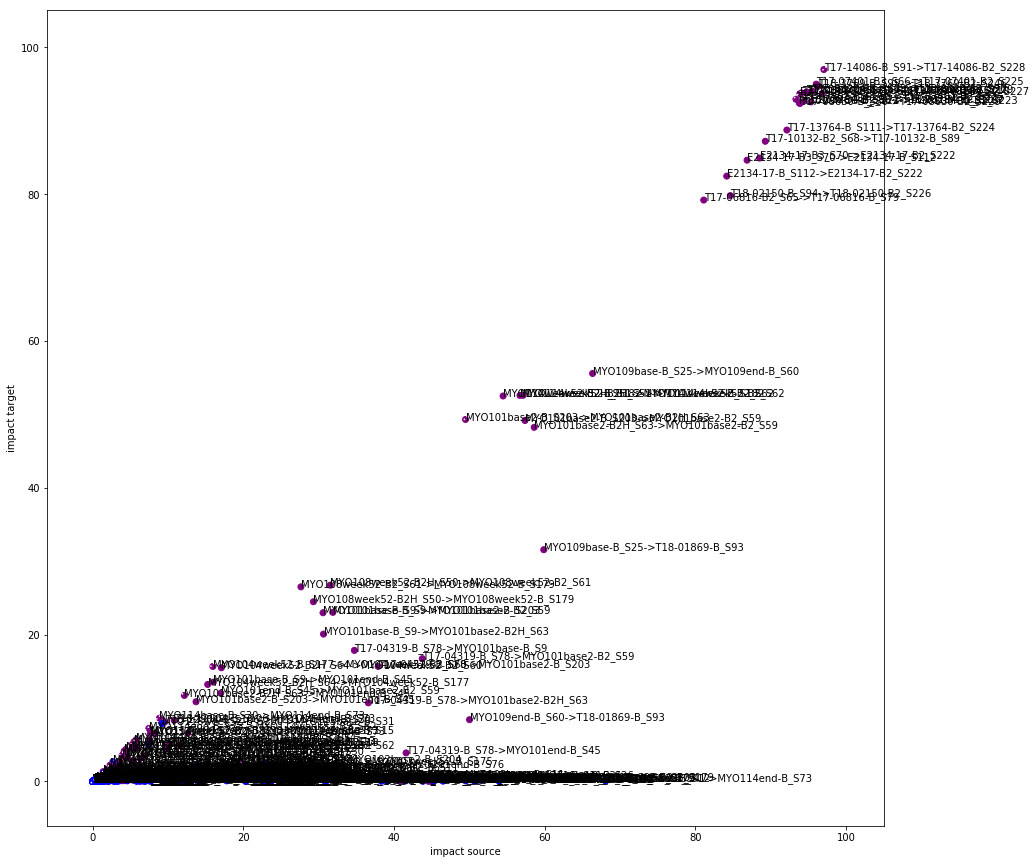

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,50,MYO116week52-B_S200,MYO115base-B_S31,9.206047,7.875256,different,MYO116week52-B_S200->MYO115base-B_S31,blue
1,61,MYO116week52-B_S200,MYO115end-B_S74,7.451541,5.003341,different,MYO116week52-B_S200->MYO115end-B_S74,blue
2,79,MYO102base2-B_S204,MYO103week52-B_S176,2.695342,2.676535,different,MYO102base2-B_S204->MYO103week52-B_S176,blue
3,80,T18-3769-B2_S246,MYO102week52-B_S175,22.888177,2.378705,different,T18-3769-B2_S246->MYO102week52-B_S175,blue
4,83,MYO103week52-B_S176,MYO102end-B_S46,3.532854,2.126063,different,MYO103week52-B_S176->MYO102end-B_S46,blue


Wrote runMyositis-IGH-HUMAN-shared-clones-different-ids.pdf to disk


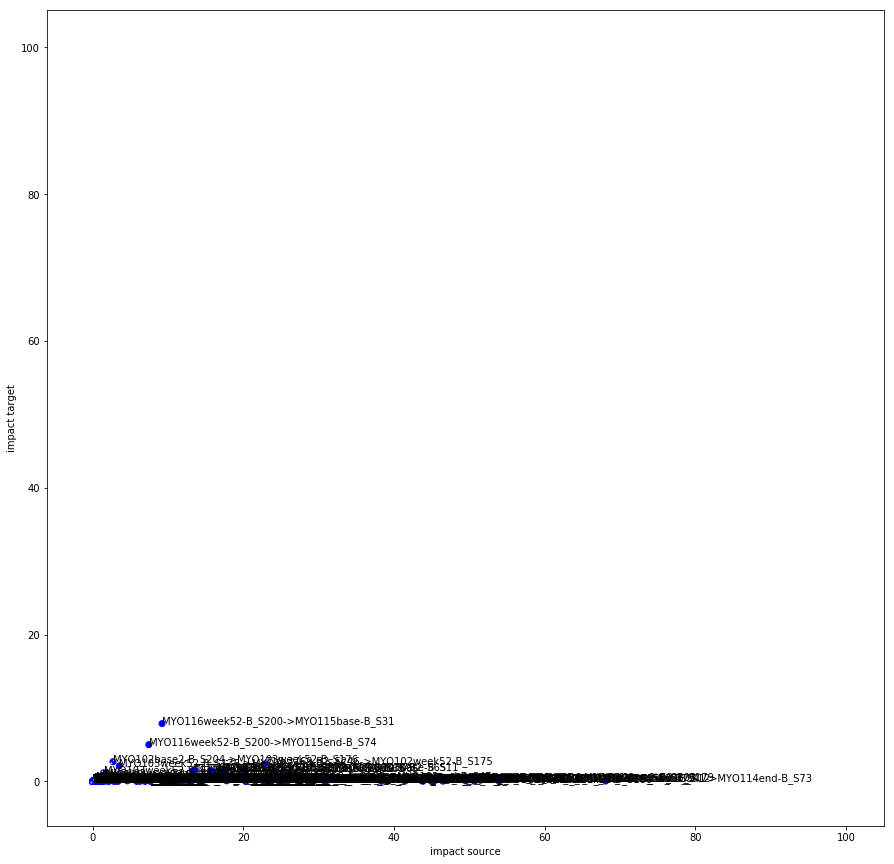

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,MYO101,MYO101base-B_S9,CAAGLGKSDSDCWGQGTLVT,2,1524,0.131234
1,MYO101,MYO101base-B_S9,CAALIVRSGSYGYWGQGTLVT,3,1524,0.196850
2,MYO101,MYO101base-B_S9,CAAPLSGNFHDHWGQGTLVT,4,1524,0.262467
3,MYO101,MYO101base-B_S9,CAAPSAEYYDSSGYWYAFDIWGQGTMVT,1,1524,0.065617
4,MYO101,MYO101base-B_S9,CAAPYHSSRDCSSTSCPRTYYYYGMDVWGQGTTVT,1,1524,0.065617


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient          Sample                     
                      nunique   names nunique                names
cdr3pep                                                           
AAAGYWFDPWGQGTLVT           1  MYO106       1     MYO106base-B_S14
AAVTDSYYGMDVWGQGTTVT        1  MYO108       1  MYO108week52-B2_S61
AHAVDYWGQGTLVT              1  MYO113       1     MYO113base-B_S29
ALLDSSYYYGMDVWGQGTTVT       1  MYO111       1     MYO111base-B_S27
ALLLSPSNGMDVWGQGTTVT        1  MYO114       1      MYO114end-B_S73

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient                cdr3pep          MYO101                      \
Sample                         MYO101base-B_S9 MYO101base2-B2H_S63   
0            AAAGYWFDPWGQGTLVT             NaN                 NaN   
1         AAVTDSYYGMDVWGQGTTVT             NaN                 NaN   
2               AHAVDYWGQGTLVT             NaN                 NaN   
3        ALLDSSYYYGMDVWGQGTTVT             NaN                 NaN   
4         ALLLSPSNGMDVWGQGTTVT             NaN                 NaN   

Patient                                                                        \
Sample  MYO101base2-B2_S59 MYO101base2-B_S203 MYO101end-B_S45 T17-04319-B_S78   
0                      NaN                NaN             NaN             NaN   
1                      NaN                NaN             NaN             NaN   
2                      NaN                NaN             NaN             NaN   
3                      NaN                NaN             NaN             NaN   
4                      NaN                NaN             NaN             NaN   

Patient           MYO102                                          ...         \
Sample  MYO102base-B_S10 MYO102base2-B_S204 MYO102end-B_S46       ...          
0                    NaN                NaN             NaN       ...          
1                    NaN                NaN             NaN       ...          
2                    NaN                NaN             NaN       ...          
3                    NaN                NaN             NaN       ...          
4                    NaN                NaN             NaN       ...          

Patient           MYO202          MYO203                                   \
Sample  MYO202base-B_S42 E2208-34-B2_S72 E2208-34-B_S107 MYO203base-B_S43   
0                    NaN             NaN             NaN              NaN   
1                    NaN             NaN             NaN              NaN   
2                    NaN             NaN             NaN              NaN   
3                    NaN             NaN             NaN              NaN   
4                    NaN             NaN             NaN              NaN   

Patient                                                 MYO301  \
Sample  MYO203end2-B_S206 MYO203week52-B_S202 MYO301base-B_S44   
0                     NaN                 NaN              NaN   
1                     NaN                 NaN              NaN   
2                     NaN                 NaN              NaN   
3                     NaN                 NaN              NaN   
4                     NaN                 NaN              NaN   

Patient                                                     
Sample  MYO301end-B_S77 Pt301UMCG-B2_S223 Pt301UMCG-B_S121  
0                   NaN               NaN              NaN  
1                   NaN               NaN              NaN  
2                   NaN               NaN              NaN  
3                   NaN               NaN              NaN  
4                   NaN               NaN              NaN  

[5 rows x 99 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index            cdr3pep Patient  \
                             nunique   
0  701970          CWGQGTLVT      17   
1  368877  CARGDAFDIWGQGTMVT      13   
2  237308    CARDLDYWGQGTLVT      12   
3  210479    CARDFDYWGQGTLVT      11   
4  374963    CARGFDYWGQGTLVT      10   

                                                      Sample  \
                                               names nunique   
0  MYO112, MYO105, MYO116, MYO101, MYO104, MYO110...      21   
1  MYO112, MYO105, MYO116, MYO104, MYO106, MYO108...      17   
2  MYO112, MYO105, MYO116, MYO106, MYO110, MYO108...      17   
3  MYO112, MYO105, MYO116, MYO106, MYO203, MYO202...      13   
4  MYO112, MYO105, MYO116, MYO104, MYO108, MYO111...      12   

                                                              MYO101  \
                                               names MYO101base-B_S9   
0  MYO115base-B_S31, MYO110end-B_S61, T18-12120-B...             NaN   
1  MYO102end-B_S46, MYO113base-B_S29, MYO103end-B...             NaN   
2  T17-10132-B2_S68, MYO105end-B_S57, MYO113base-...             NaN   
3  MYO105end-B_S57, MYO103end-B_S47, MYO115base-B...             NaN   
4  MYO105end-B_S57, MYO113base-B_S29, MYO104end-B...             NaN   

                                                                  ...         \
  MYO101base2-B2H_S63 MYO101base2-B2_S59 MYO101base2-B_S203       ...          
0                 NaN                NaN                NaN       ...          
1                 NaN                NaN                NaN       ...          
2                 NaN                NaN                NaN       ...          
3                 NaN                NaN                NaN       ...          
4                 NaN                NaN                NaN       ...          

            MYO202          MYO203                                   \
  MYO202base-B_S42 E2208-34-B2_S72 E2208-34-B_S107 MYO203base-B_S43   
0              NaN        0.002785             NaN              NaN   
1              NaN             NaN             NaN              NaN   
2              NaN             NaN             NaN         0.015361   
3         0.005134             NaN             NaN         0.168975   
4              NaN             NaN             NaN              NaN   

                                                  MYO301                  \
  MYO203end2-B_S206 MYO203week52-B_S202 MYO301base-B_S44 MYO301end-B_S77   
0               NaN                 NaN              NaN        0.003019   
1               NaN            0.012019              NaN             NaN   
2          0.010392                 NaN         0.017538             NaN   
3               NaN                 NaN              NaN             NaN   
4               NaN                 NaN              NaN             NaN   

                                      
  Pt301UMCG-B2_S223 Pt301UMCG-B_S121  
0               NaN              NaN  
1               NaN              NaN  
2               NaN              NaN  
3               NaN              NaN  
4               NaN              NaN  

[5 rows x 104 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 705855
cdr3's in > 1 sample: 19747


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote runMyositis-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
